## Simulating an ordinary differential equation with SciPy
Lab I.100 Rozwiązania układu Lotki-Volterry
Wykorzystując metodę Eulera rozwiąż numerycznie autonomiczny układ równań różniczkowych zwyczajnych typu Lotki-Volterry. Szkielet propozycji rozwiązania znajduje się w dołączonyn do zadania notebooku Lab.I.100.raw.ipynb. Rozwiązanie numeryczne układu autonomicznego
 y′ = f (y) polega na próbkowaniu czasu krokiem dt i zastąpieniu y′(t) ilorazem \frac{y(t+dt)−y(t)}{dt} oraz warunkiem początkowym y0 = y(t0), a następnie iteracją y_{n+1} =y_{n} +dt·f(y_n).

In [1]:
import numpy as np
import scipy.integrate as spi
from scipy.integrate import solve_ivp
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def lotkaV(t,z):
    x,y = z
    return [x*(5-0.005*x-0.2*y), y*(-1+0.03*x-0.01*y)]

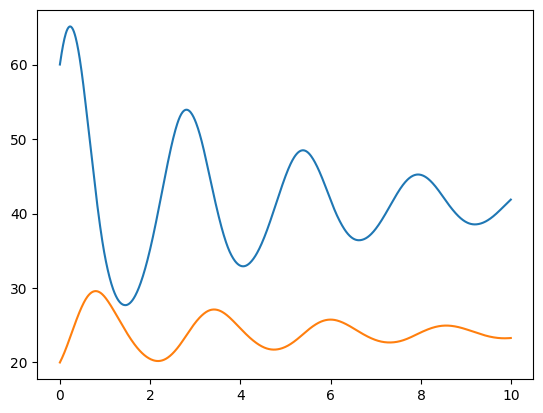

<class 'scipy.integrate._ivp.ivp.OdeResult'>,<class 'scipy.integrate._ivp.common.OdeSolution'>


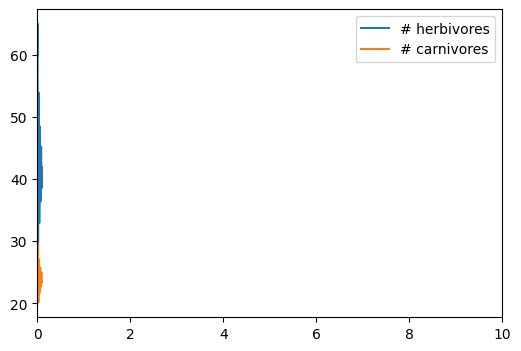

In [3]:
sol = solve_ivp(lotkaV, [0,10], [60,20], dense_output=True)
t = np.arange(0,10,0.01)
z = sol.sol(t)
plt.plot(t, z.T)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(t, z[0], label=f'# herbivores')
ax.plot(t, z[1], label=f'# carnivores')
ax.legend()
ax.set_xlim(0, 1000)
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*1/100))
ax.xaxis.set_major_formatter(ticks)
print( str(type(sol))+","+ str(type(sol.sol)))

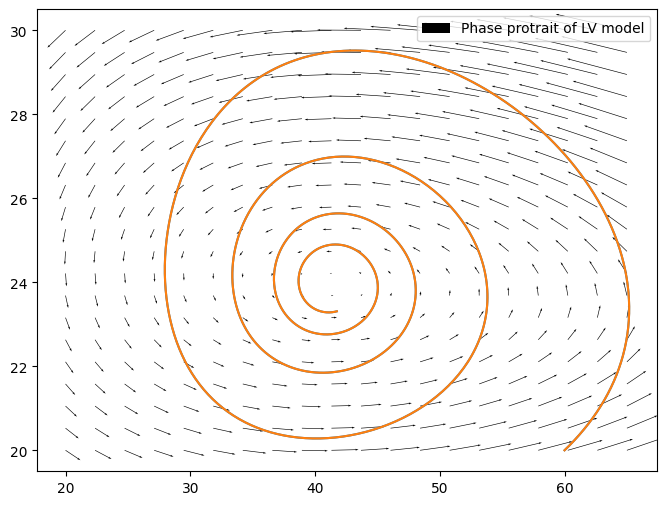

In [6]:
from scipy.integrate import odeint

def vfield(point, t=0):
    return (point[0]*(5-0.005*point[0]-0.2*point[1]), point[1]*(-1+0.03*point[0]-0.01*point[1]))

he = np.linspace(20,65,20)
ca = np.linspace(20,30,20)
he,ca = np.meshgrid(he,ca)

dhe,dca=vfield((he,ca))

t=np.linspace(0,10,1000)
sol=odeint(vfield,[60,20],t)


fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.quiver(he,ca,dhe,dca,width=0.001,scale=750)
ax.plot(sol[:,0], sol[:,1])
ax.legend(["Phase protrait of LV model"])


plt.plot(sol[:,0], sol[:,1])
plt.show()


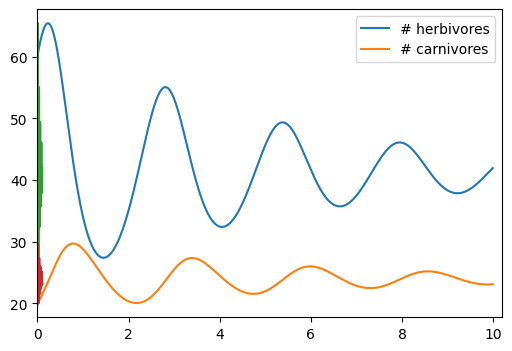

In [16]:
dt = 0.01 # time step
T = 10 # total time
n = int(T/dt) # number of time steps

# x = np.zeros(n)
# y = np.zeros(n)
#
# x[0] = 60
# y[0] = 20

x = [60]
y = [20]

def LV_Euler(x, y, n, dt):

    for i in range(n-1):
        fx, fy = lotkaV(i,z=(x[i],y[i]))
        x_next = x[i] + fx * dt
        y_next = y[i] + fy * dt
        x.append(x_next)
        y.append(y_next)

    return np.array(x), np.array(y)


x,y = LV_Euler(x, y, n, dt)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(x, label=f'# herbivores')
ax.plot(y, label=f'# carnivores')
ax.legend()
ax.set_xlim(0, 1020)
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*1/100))
ax.xaxis.set_major_formatter(ticks)


plt.plot(t, x, lw=2, label=f'roslin')
plt.plot(t, y, lw=2, label=f'mięso')